# Inspiration
Socio-economic classification models in the Philippines has been very problematic. In fact, not one SEC model has been widely accepted. Government bodies uses their own SEC models and private research entities uses their own. We all know that household income is the greatest indicator of one's socio-economic classification that's why the publisher would like to find out the following:

1. Best model in predicting household income
2. Key drivers of household income, we want to make the model as sparse as possible
3. Some exploratory analysis in the data would also be useful

From <https://www.kaggle.com/grosvenpaul/family-income-and-expenditure>

---

## Libraries

In [1]:
# MSJ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# MSJf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data import

In [3]:
# Importing csv data into pandas dataframes
df = pd.read_csv('./family-income-expenditure.csv')

In [4]:
df.head(5)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

## Building Income Predictor

In [6]:
income_data = df.iloc[:,[0,1,3,4,24,25,26,27,28,29,30,31,36,43]]

In [7]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Total Household Income                        41544 non-null  int64 
 1   Region                                        41544 non-null  object
 2   Main Source of Income                         41544 non-null  object
 3   Agricultural Household indicator              41544 non-null  int64 
 4   Total Income from Entrepreneurial Acitivites  41544 non-null  int64 
 5   Household Head Sex                            41544 non-null  object
 6   Household Head Age                            41544 non-null  int64 
 7   Household Head Marital Status                 41544 non-null  object
 8   Household Head Highest Grade Completed        41544 non-null  object
 9   Household Head Job or Business Indicator      41544 non-null  object
 10

In [9]:
income_data.head()

,Total Household Income,Region,Main Source of Income,Agricultural Household indicator,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Total number of family members employed,Tenure Status
0,480332,CAR,Wage/Salaries,0,44370,Female,49,Single,Teacher Training and Education Sciences Programs,With Job/Business,General elementary education teaching professi...,Worked for government/government corporation,1,Own or owner-like possession of house and lot
1,198235,CAR,Wage/Salaries,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,2,Own or owner-like possession of house and lot
2,82785,CAR,Wage/Salaries,1,0,Male,39,Married,Grade 3,With Job/Business,Farmhands and laborers,Worked for private establishment,3,Own or owner-like possession of house and lot
3,107589,CAR,Wage/Salaries,0,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,2,Own or owner-like possession of house and lot
4,189322,CAR,Wage/Salaries,0,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,2,Own or owner-like possession of house and lot


## Data Prep

In [10]:
# Remove "anomalies" -> Super Rich and Super Power; Keep only middle-class
income_data_middle = income_data[(income_data['Total Household Income'] >=100000) & (income_data['Total Household Income'] <= 200000)]

In [11]:
income_data_middle.head()

,Total Household Income,Region,Main Source of Income,Agricultural Household indicator,Total Income from Entrepreneurial Acitivites,Household Head Sex,Household Head Age,Household Head Marital Status,Household Head Highest Grade Completed,Household Head Job or Business Indicator,Household Head Occupation,Household Head Class of Worker,Total number of family members employed,Tenure Status
1,198235,CAR,Wage/Salaries,0,0,Male,40,Married,Transport Services Programs,With Job/Business,Transport conductors,Worked for private establishment,2,Own or owner-like possession of house and lot
3,107589,CAR,Wage/Salaries,0,15580,Male,52,Married,Elementary Graduate,With Job/Business,Rice farmers,Employer in own family-operated farm or business,2,Own or owner-like possession of house and lot
4,189322,CAR,Wage/Salaries,0,75687,Male,65,Married,Elementary Graduate,With Job/Business,General managers/managing proprietors in trans...,Self-employed wihout any employee,2,Own or owner-like possession of house and lot
5,152883,CAR,Wage/Salaries,0,0,Male,46,Married,Second Year High School,With Job/Business,Heavy truck and lorry drivers,Worked for private establishment,3,Own or owner-like possession of house and lot
6,198621,CAR,Wage/Salaries,0,72290,Male,45,Married,Third Year High School,With Job/Business,Rice farmers,Employer in own family-operated farm or business,1,Own or owner-like possession of house and lot


In [15]:
# Change data to numbers
data_for_model = pd.get_dummies(income_data_middle, drop_first=False);
data_for_model.head()

,Total Household Income,Agricultural Household indicator,Total Income from Entrepreneurial Acitivites,Household Head Age,Total number of family members employed,Region_ ARMM,Region_CAR,Region_Caraga,Region_I - Ilocos Region,Region_II - Cagayan Valley,...,Household Head Class of Worker_Worked with pay in own family-operated farm or business,Household Head Class of Worker_Worked without pay in own family-operated farm or business,Tenure Status_Not Applicable,"Tenure Status_Own house, rent lot","Tenure Status_Own house, rent-free lot with consent of owner","Tenure Status_Own house, rent-free lot without consent of owner",Tenure Status_Own or owner-like possession of house and lot,Tenure Status_Rent house/room including lot,Tenure Status_Rent-free house and lot with consent of owner,Tenure Status_Rent-free house and lot without consent of owner
1,198235,0,0,40,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,107589,0,15580,52,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,189322,0,75687,65,2,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,152883,0,0,46,3,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,198621,0,72290,45,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Train and Test Data

In [37]:
# Set X to all columns except for first column
X = data_for_model[data_for_model.columns[-347:]]

In [42]:
# Set Y to Total Household Income (What we want to predict)
y = data_for_model['Total Household Income']

In [43]:
# MSJ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Train model

In [50]:
# MSJ
model = LinearRegression()

In [51]:
# MSJ
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# MSJ: coefficients
model.coef_,X.columns

(array([-3.36434025e+03,  5.17398110e-01,  1.23316115e+02,  5.99822409e+03,
        -1.53307296e+10, -1.53307156e+10, -1.53307206e+10, -1.53307165e+10,
        -1.53307139e+10, -1.53307108e+10, -1.53307123e+10, -1.53307199e+10,
        -1.53307209e+10, -1.53306965e+10, -1.53307199e+10, -1.53307181e+10,
        -1.53307142e+10, -1.53307203e+10, -1.53307222e+10, -1.53307150e+10,
        -1.53307200e+10, -1.41839910e+11, -1.41839881e+11, -1.41839881e+11,
         4.72507401e+10,  4.72507380e+10, -2.27817013e+09, -3.34623963e+10,
        -3.34623949e+10, -3.34623996e+10,  3.95842276e+09, -3.34623978e+10,
         6.66491648e+08,  6.66525712e+08,  1.08826555e+09,  6.66468265e+08,
         6.66497998e+08,  6.66488476e+08,  6.66484713e+08,  6.66495992e+08,
         6.66490937e+08,  6.66505052e+08,  6.66492392e+08,  6.66485001e+08,
         6.66494739e+08,  6.66496105e+08,  6.66483393e+08,  6.66482422e+08,
         6.66484976e+08,  6.66481385e+08,  6.66485184e+08,  6.66483653e+08,
         6.6

In [54]:
# MSJ: Evaluate coefficients
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Agricultural Household indicator,-3.364340e+03
Total Income from Entrepreneurial Acitivites,5.173981e-01
Household Head Age,1.233161e+02
Total number of family members employed,5.998224e+03
Region_ ARMM,-1.533073e+10
...,...
"Tenure Status_Own house, rent-free lot without consent of owner",8.119317e+09
Tenure Status_Own or owner-like possession of house and lot,8.119315e+09
Tenure Status_Rent house/room including lot,8.119313e+09
Tenure Status_Rent-free house and lot with consent of owner,8.119315e+09


## Predicting Test Data

In [55]:
# MSJ
model.predict(X_test)

array([116596.66304016, 177617.54342651, 138741.07073975, ...,
       116486.52537537, 133496.3931427 , 161869.53092957])

## Check Model

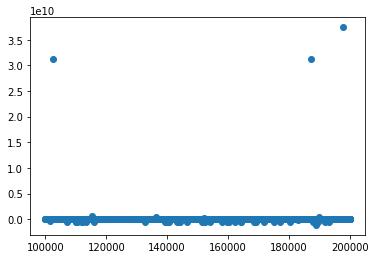

In [57]:
# MSJ
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)

In [58]:
# MSJ - Evaluate - Check MAE, MSE and RMSE
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19702042.5909718
MSE: 5.417425614728455e+17
RMSE: 736031630.7556663


## Conclusion

Created a bad model here :(